In [7]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR, PaddleOCR
from colordict import ColorDict
from IPython.display import display_html
import cv2
import numpy as np

In [8]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [10]:
img = Image(r"C:\Users\xavca\Pictures\test_aws.jpg")
ocr = PaddleOCR()

ocr_df = ocr.of(img)

In [12]:
ocr_df.df.collect().to_pandas().to_csv("data/ocr_df.csv", sep=";", index=False)

In [4]:
tables = img.extract_tables(ocr=ocr, implicit_rows=True, borderless_tables=True)

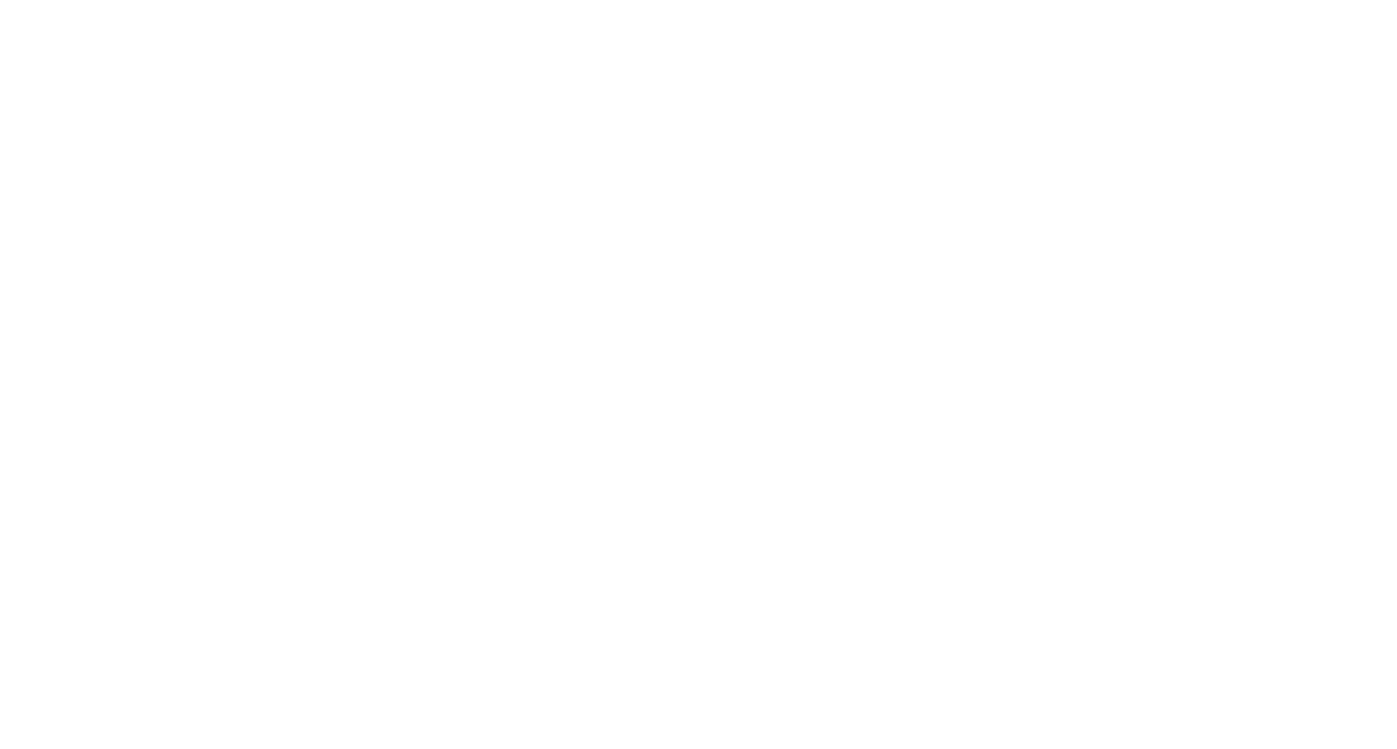

In [5]:
display_img = cv2.cvtColor(list(img.images)[0], cv2.COLOR_GRAY2RGB)

for table in tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(display_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(display_img)

In [6]:
for idx, table in enumerate(tables):
    display_html(table.html_repr(title=f"Extracted table n°{idx + 1}"), raw=True)